# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        status_code = response.status_code
        
        
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {}

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


    time.sleep(1)


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | richards bay
Processing Record 5 of Set 1 | sucua
Processing Record 6 of Set 1 | minas de barroteran
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | nar'yan-mar
Processing Record 10 of Set 1 | manggar
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | angaur state
Processing Record 13 of Set 1 | howard springs
Processing Record 14 of Set 1 | robertsport
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | mabaruma
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | tumut
Processing Record 20 of Set 1 | pinotepa nacional
Processing Record 21 of Set 1 | taiohae
Processing Record 22 o

KeyboardInterrupt: 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,81.91,72.0,100.0,13.80,US,1.717541e+09
1,ushuaia,-54.8000,-68.3000,33.46,93.0,75.0,3.44,AR,1.717541e+09
2,bilibino,68.0546,166.4372,53.47,51.0,100.0,3.13,RU,1.717541e+09
3,richards bay,-28.7830,32.0377,62.31,42.0,0.0,5.35,ZA,1.717541e+09
4,sucua,-2.4667,-78.1667,77.74,60.0,100.0,3.44,EC,1.717541e+09


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,81.91,72.0,100.0,13.80,US,1.717541e+09
1,ushuaia,-54.8000,-68.3000,33.46,93.0,75.0,3.44,AR,1.717541e+09
2,bilibino,68.0546,166.4372,53.47,51.0,100.0,3.13,RU,1.717541e+09
3,richards bay,-28.7830,32.0377,62.31,42.0,0.0,5.35,ZA,1.717541e+09
4,sucua,-2.4667,-78.1667,77.74,60.0,100.0,3.44,EC,1.717541e+09


In [9]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 565
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        566 non-null    object 
 1   Lat         538 non-null    float64
 2   Lng         538 non-null    float64
 3   Max Temp    538 non-null    float64
 4   Humidity    538 non-null    float64
 5   Cloudiness  538 non-null    float64
 6   Wind Speed  538 non-null    float64
 7   Country     533 non-null    object 
 8   Date        538 non-null    float64
dtypes: float64(7), object(2)
memory usage: 44.2+ KB


In [10]:
city_data_df.loc[pd.isnull(city_data_df.Lat)]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
20,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,dadonghai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,fuvahmulah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,vingt cinq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,devinuwara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,hihifo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,ahau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,samamea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = city_data_df.dropna(how="any").reset_index()

df.info

<bound method DataFrame.info of      City_ID                    City      Lat       Lng  Max Temp  Humidity  \
0          0  hawaiian paradise park  19.5933 -154.9731     81.91      72.0   
1          1                 ushuaia -54.8000  -68.3000     33.46      93.0   
2          2                bilibino  68.0546  166.4372     53.47      51.0   
3          3            richards bay -28.7830   32.0377     62.31      42.0   
4          4                   sucua  -2.4667  -78.1667     77.74      60.0   
..       ...                     ...      ...       ...       ...       ...   
528      560             chibougamau  49.9168  -74.3659     78.42      41.0   
529      561              bianzhuang  34.8486  118.0447     68.81      67.0   
530      562                   kharp  66.8014   65.8081     31.71      88.0   
531      563                 debark'  13.1561   37.8981     64.22      34.0   
532      564                coracora -15.0333  -73.7833     54.43      48.0   

     Cloudiness  Wi

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

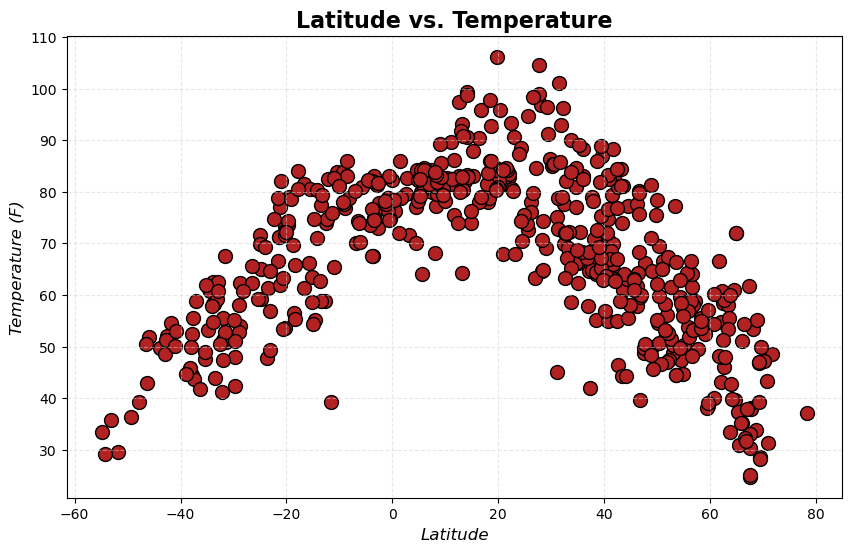

In [13]:
# Build scatter plot for latitude vs. temperature
x = df.Lat
y = df["Max Temp"]

plt.figure(figsize=(10,6))

plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

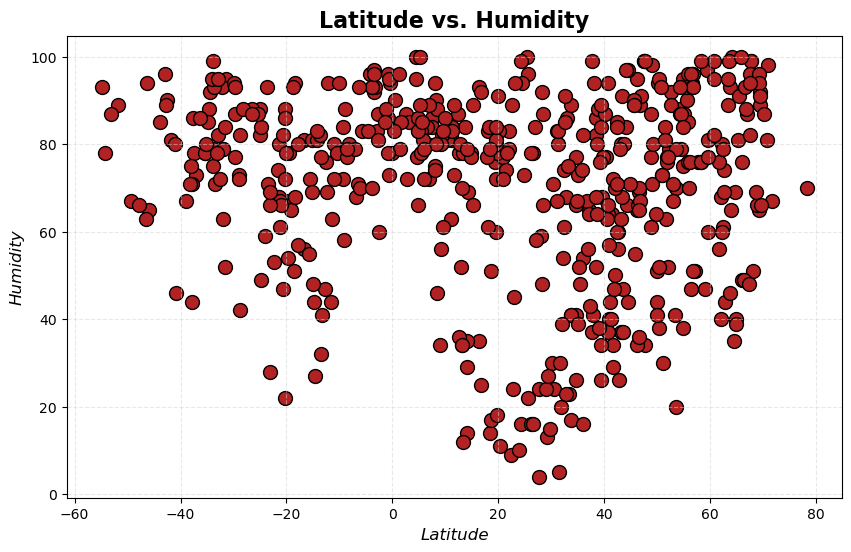

In [14]:
# Build the scatter plots for latitude vs. humidity
x = df.Lat
y = df.Humidity

plt.figure(figsize=(10,6))

plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

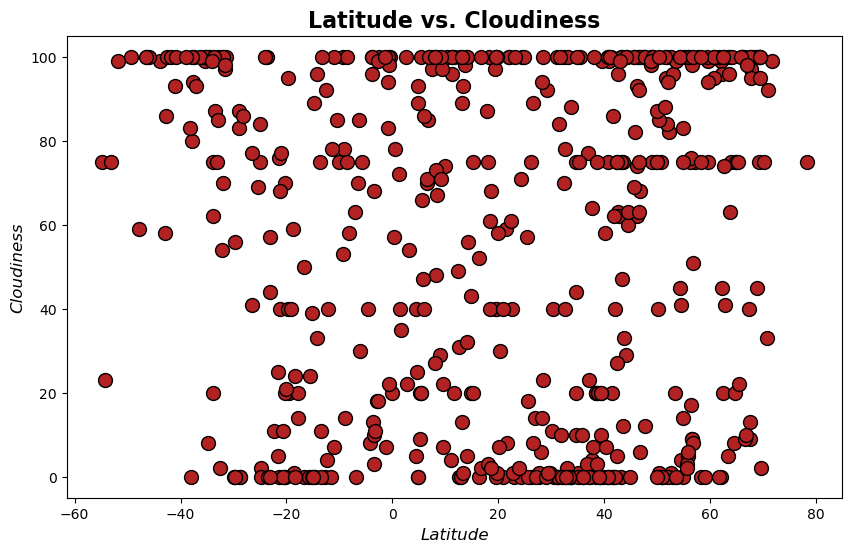

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x = df.Lat
y = df["Cloudiness"]

plt.figure(figsize=(10,6))

plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Cloudiness", fontweight="bold", fontsize=16)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

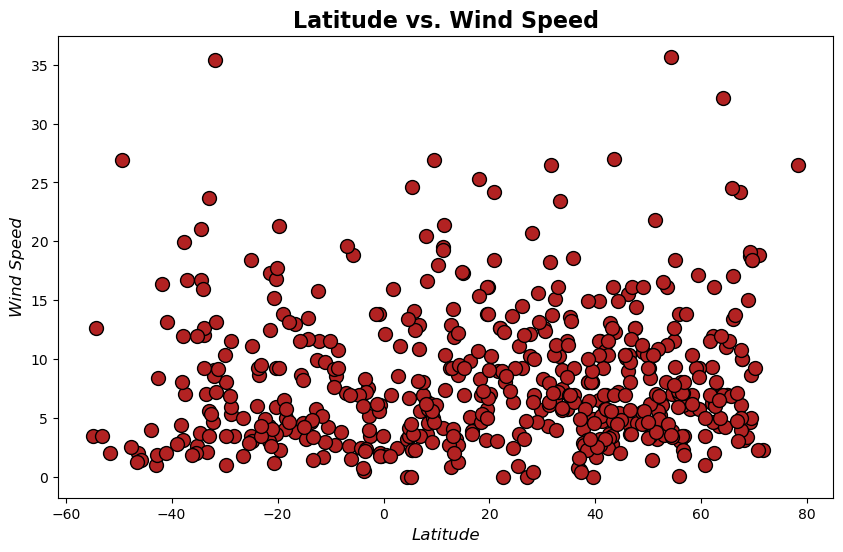

In [18]:
# Build the scatter plots for latitude vs. wind speed
x = df.Lat
y = df["Wind Speed"]

plt.figure(figsize=(10,6))

plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Wind Speed", fontweight="bold", fontsize=16)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize=(10, 6))
    

    plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,hawaiian paradise park,19.5933,-154.9731,81.91,72.0,100.0,13.80,US,1.717541e+09
2,2,bilibino,68.0546,166.4372,53.47,51.0,100.0,3.13,RU,1.717541e+09
5,5,minas de barroteran,27.6333,-101.2833,104.58,24.0,0.0,12.10,MX,1.717541e+09
6,6,tiksi,71.6872,128.8694,48.60,67.0,99.0,2.30,RU,1.717541e+09
8,8,nar'yan-mar,67.6713,53.0870,38.10,99.0,97.0,10.00,RU,1.717541e+09


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,ushuaia,-54.8000,-68.3000,33.46,93.0,75.0,3.44,AR,1.717541e+09
3,3,richards bay,-28.7830,32.0377,62.31,42.0,0.0,5.35,ZA,1.717541e+09
4,4,sucua,-2.4667,-78.1667,77.74,60.0,100.0,3.44,EC,1.717541e+09
7,7,port mathurin,-19.6833,63.4167,73.56,67.0,95.0,21.30,MU,1.717541e+09
9,9,manggar,-2.8833,108.2667,81.34,83.0,18.0,7.54,ID,1.717541e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5896934535121962


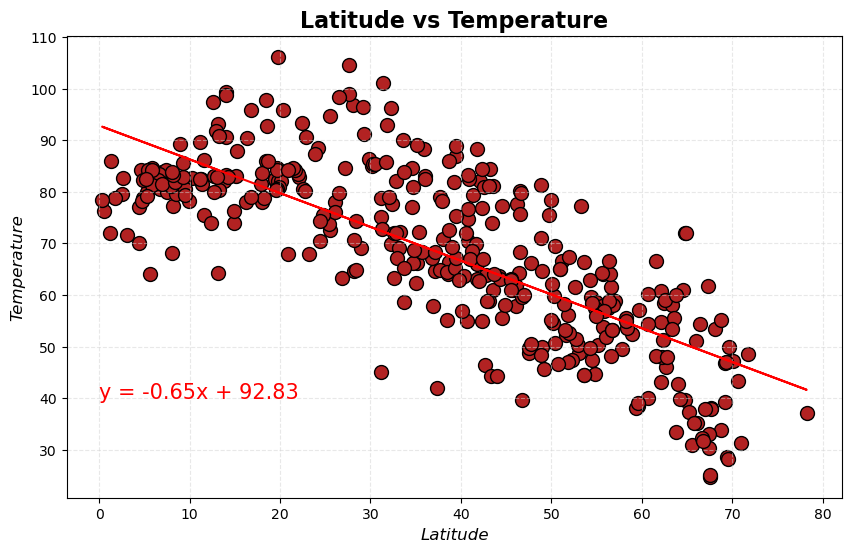

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat 
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (0,40))

The r-squared is: 0.6633121882974031


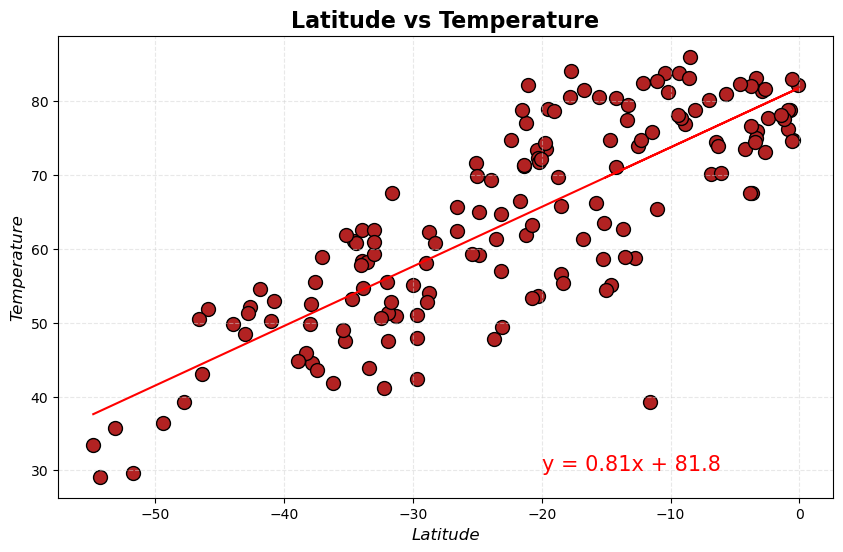

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat 
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (-20,30))

**Discussion about the linear relationship:** Closer to the Equator you go the hotter the temperature gets in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.007161452999786199


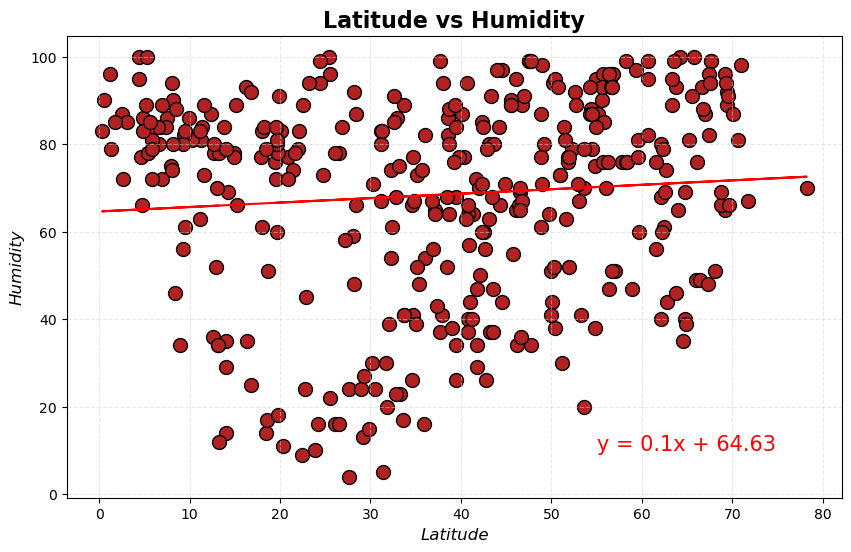

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (55,10))

The r-squared is: 1.443485062388426e-05


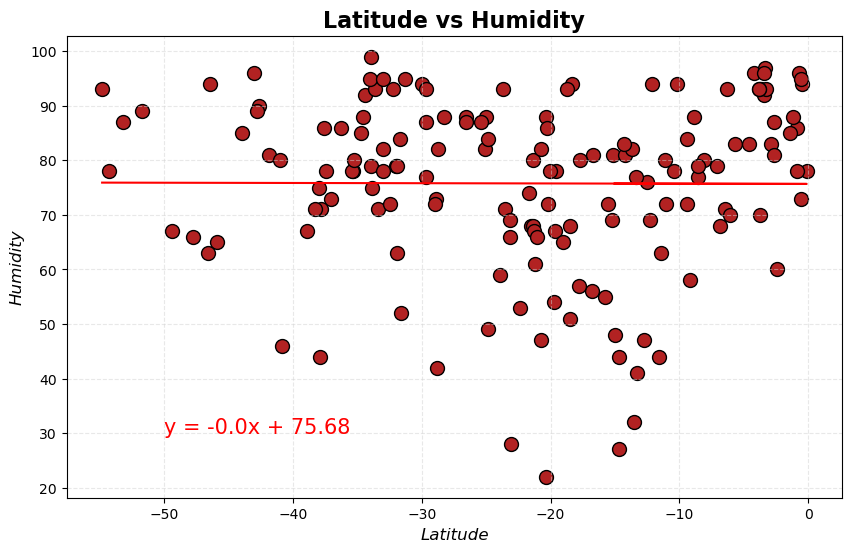

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (-50,30))

**Discussion about the linear relationship:** I do not believe there is a real correlation here. The line of best fit for both hemispheres do not have much of a slope.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01488859805743583


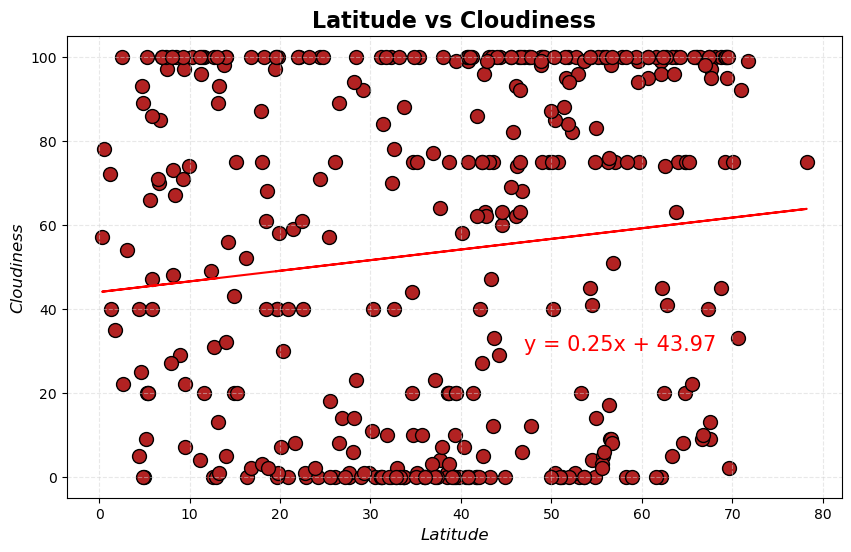

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (47,30))

The r-squared is: 0.06719765595780128


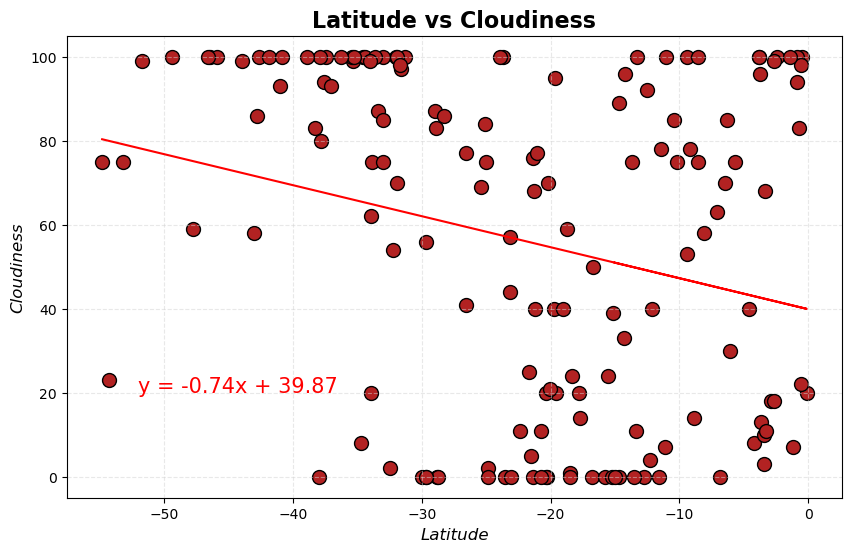

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (-52,20))

**Discussion about the linear relationship:** It is more cloudy the farther away from the Equator that you go.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0018118369884521095


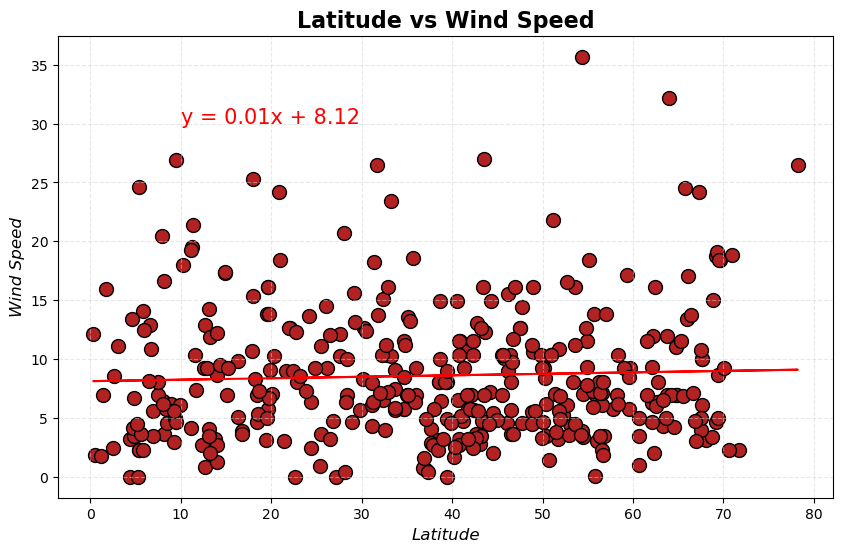

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (10,30))

The r-squared is: 0.011517040709559492


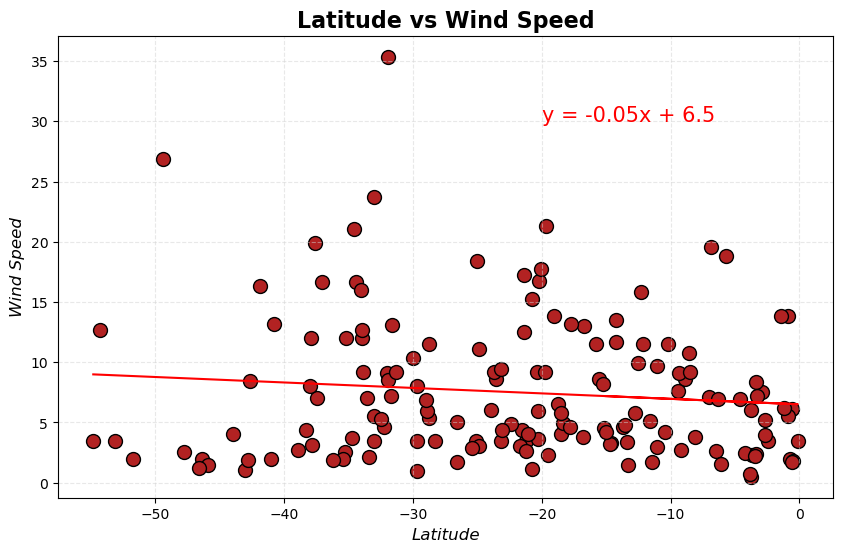

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (-20,30))

**Discussion about the linear relationship:** Wind speed is not affected by the distance from the Equator